<a href="https://colab.research.google.com/github/changsin/ClassifyImages/blob/main/notebooks/dashboard_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
Install requirements and prepare the dataset for training.



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DATA_ROOT = "/content/drive/MyDrive/data/Top15/train_top15_a_seatbelt/"

In [6]:
import glob
import os

def glob_files(path, file_type="*"):
    search_string = os.path.join(path, file_type)
    files = glob.glob(search_string)

    # print('searching ', path)
    paths = []
    for f in files:
      if os.path.isdir(f):
        sub_paths = glob_files(f + '/')
        paths += sub_paths
      else:
        paths.append(f)

    # We sort the images in alphabetical order to match them
    #  to the annotation files
    paths.sort()

    return paths


In [7]:
import cv2
import numpy as np

IMAGE_SIZE = 600

def load_images(path):
  files = glob_files(path, "*.jpg")

  # print(files)
  X_data = []
  for file in files:
    image = cv2.imread(file)
    image = image/255
    # print(image.shape)
    # x = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

    X_data.append(image)
  return np.array(X_data)

In [8]:
X = load_images(DATA_ROOT + "train_top15_a_seatbelt_0/")
X.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


(90,)

In [9]:
# WIDTH = 1920
# HEIGHT = 1080

def load_labels(path, X):
  files = glob_files(path, "*.txt")

  Y_data = []
  for file, x in zip(files, X):
    width = x.shape[1]
    height = x.shape[0]
    with open(file) as f:
      lines = f.readlines()

      boxes = []
      for line in lines:
        tokens = line.split()

        class_id = int(tokens[0])
        xc = float(tokens[1]) * width
        yc = float(tokens[2]) * height
        box_width = float(tokens[3]) * width
        box_height = float(tokens[4]) * height

        boxes.append(np.array([class_id, xc, yc, box_width, box_height]))
        # print(class_id, xc, yc, width, height)

      Y_data.append(np.array(boxes))
      # print(lines)
  return np.array(Y_data)

Y = load_labels(DATA_ROOT + "train_top15_a_seatbelt_0/", X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [59]:
Y.shape

(90,)

In [222]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

COLORS = [(0, 255/255, 0), (255/255, 255/255, 0), (255/255, 0, 0)]

def create_patch_rectangle(y, color=COLORS[2]):
  # # in yolov5
  width = int(y[2])
  height = int(y[3])
  return patches.Rectangle((int(y[0] - width/2), int(y[1] - height/2)),
                           width, height,
                           edgecolor=color, fill=False)

def get_box_images(image, y):
  box_images = []


  xc, yc, box_width, box_height = get_box(y)
  height, width, _ = image.shape

  x = xc - int(box_width/2)
  y = yc - int(box_height/2)

  # print("shape: ", height, width)
  # print("x:", x, box_width, "y:", y, box_height)
  # print("x:", x, x + box_width, "y:", y, y + box_height)
  print(image[y:y+box_height, x:x+box_width].shape)
  return 
  # axis.imshow(image[y:y+box_height, x:x+box_width])


COLORS = [(0, 255/255, 0), (255/255, 255/255, 0), (255/255, 0, 0)]

def plot_image(image, boxes, axis):
  # print(boxes.shape)
  for box in boxes:
    # print(box)
    class_id = int(box[0])
    # print(type(class_id), class_id)
    rect = create_patch_rectangle(box[1:])
    axis.add_patch(rect)

  plt.imshow(image)

def plot_images(X, Y, limit=10):
  fig = plt.figure(figsize=(100, 80))

  last_id = min(limit, X.shape[0])
  for id in range(last_id):
    axis = fig.add_subplot(5, 3, id + 1)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    plot_image(X[id], Y[id], axis)

def plot_label_images(X, Y, limit=10):
  fig = plt.figure(figsize=(100, 80))

  last_id = min(limit, X.shape[0])
  for id in range(last_id):
    axis = fig.add_subplot(5, 3, id + 1)
    axis.get_xaxis().set_visible(False)
    axis.get_yaxis().set_visible(False)
    axis.imshow(X[id])
    axis.set_title(Y[id])
  fig.show()

def get_box(y):
  width = int(y[2])
  height = int(y[3])
  return int(y[0] - width/2), int(y[1] - height/2), width, height

def plot_labels(X, Y, limit=30):
  fig = plt.figure(figsize=(10, 8))
  last_id = min(limit, X.shape[0])

  print(last_id, limit, X.shape[0])

  label_id = 1
  for id in range(last_id):

    image = X[id]
    for box in Y[id]:
      if label_id >= 100:
        break

      class_id = int(box[0])
      x, y, box_width, box_height = get_box(box[1:])
      # print("y:", y, y + box_height, "x:", x, x + box_width)
      # print(image[y:y+box_height, x:x+box_width].shape)

      axis = fig.add_subplot(10, 10, label_id)
      axis.get_xaxis().set_visible(False)
      axis.get_yaxis().set_visible(False)
      axis.imshow(image[y:y+box_height, x:x+box_width])

      axis.show()
      label_id += 1

def extract_box_image_data(X, Y):
  box_images = []
  box_labels = []
  for id in range(len(X)):
    image = X[id]
    for box in Y[id]:
      class_id = int(box[0])
      box_labels.append(class_id)

      x, y, box_width, box_height = get_box(box[1:])
      box_images.append(image[y:y+box_height, x:x+box_width])

  return np.array(box_images), np.array(box_labels)
# plot_images(np.array(X[:1]), np.array(Y[:1]))

In [223]:
# plot_labels(np.array(X[:50]), np.array(Y[:50]), limit=50)

box_images, box_labels = extract_box_image_data(X, Y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:111: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [224]:
box_labels.shape
box_images.shape

(623,)

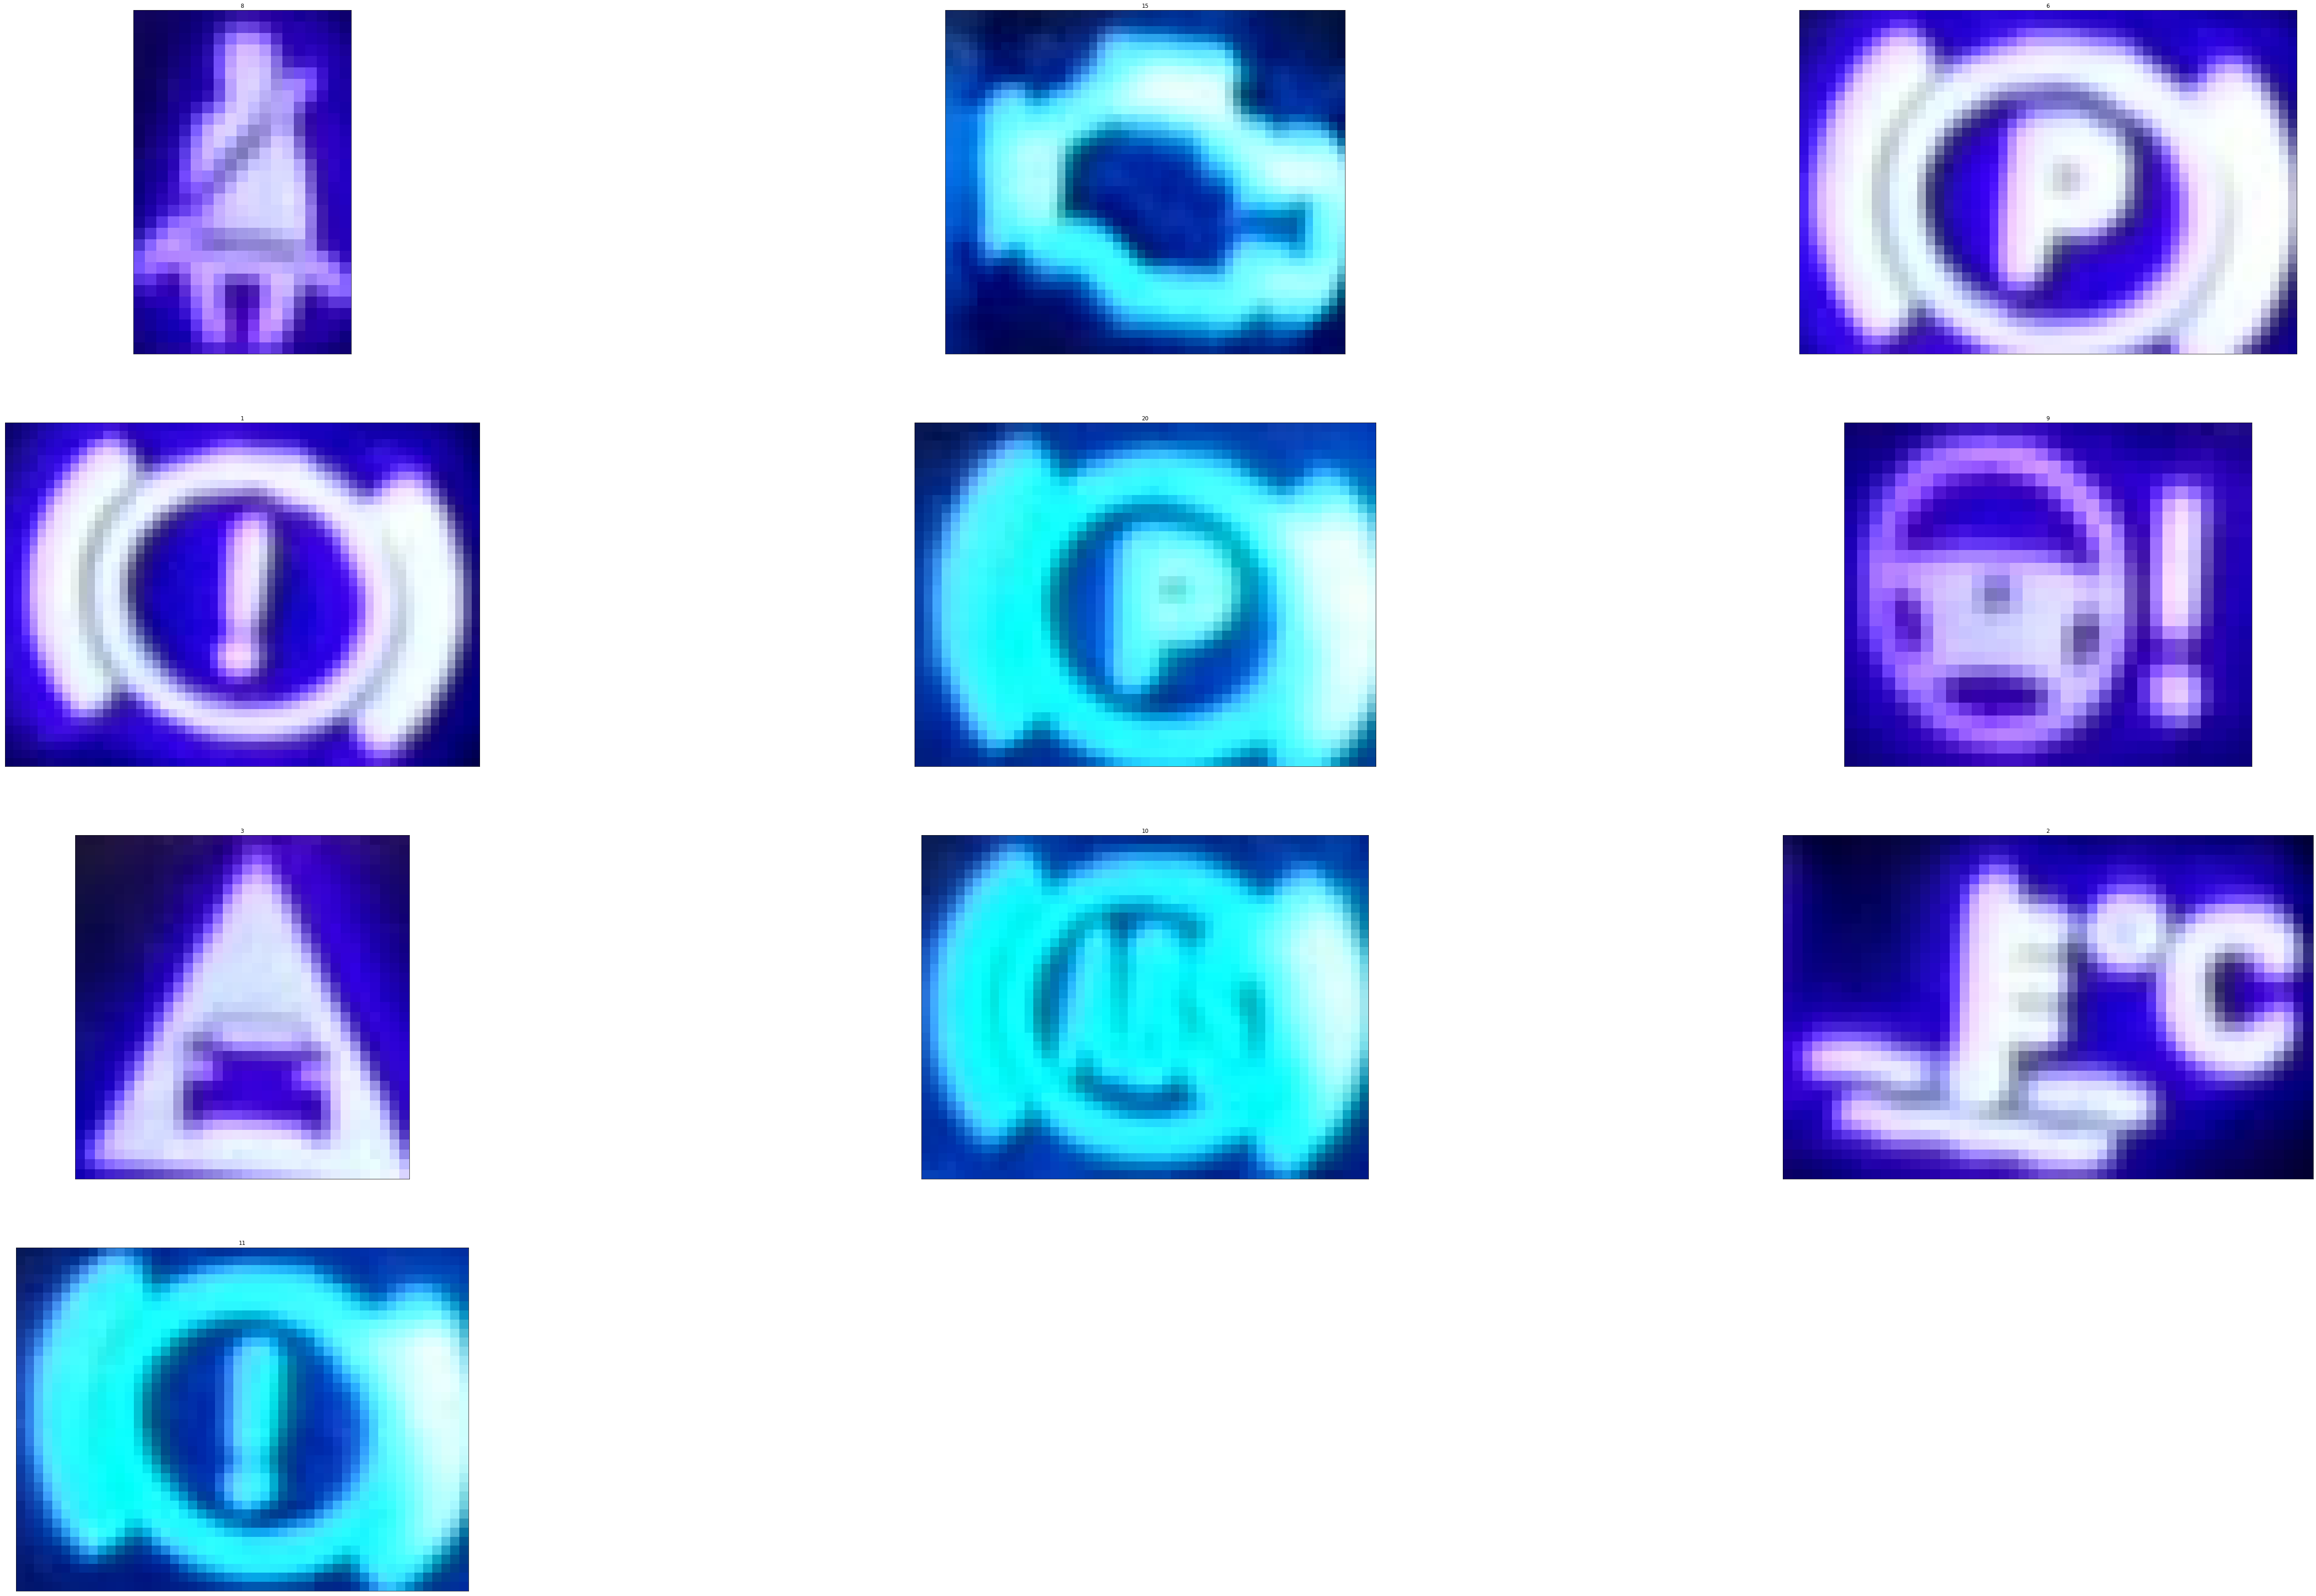

In [225]:
plot_label_images(box_images, box_labels)

In [83]:
X[0].shape

(1080, 1920, 3)

(30, 19, 3)

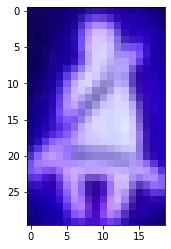

In [114]:
# 827, 531, 19, 30
plt.imshow(X[0][515:545, 817:836])
X[0][515:545, 817:836].shape

In [23]:
X[0][817:817+19, 515:515+30].shape

(19, 30, 3)